Proyecto 1 BI - Analítica de Textos
* Estudiante 1: Juan Diego Sarmiento Sánchez - 202121484
* Estudiante 2:
* Estudiante 3: Germán Alberto Rojas Cetina - 202013415

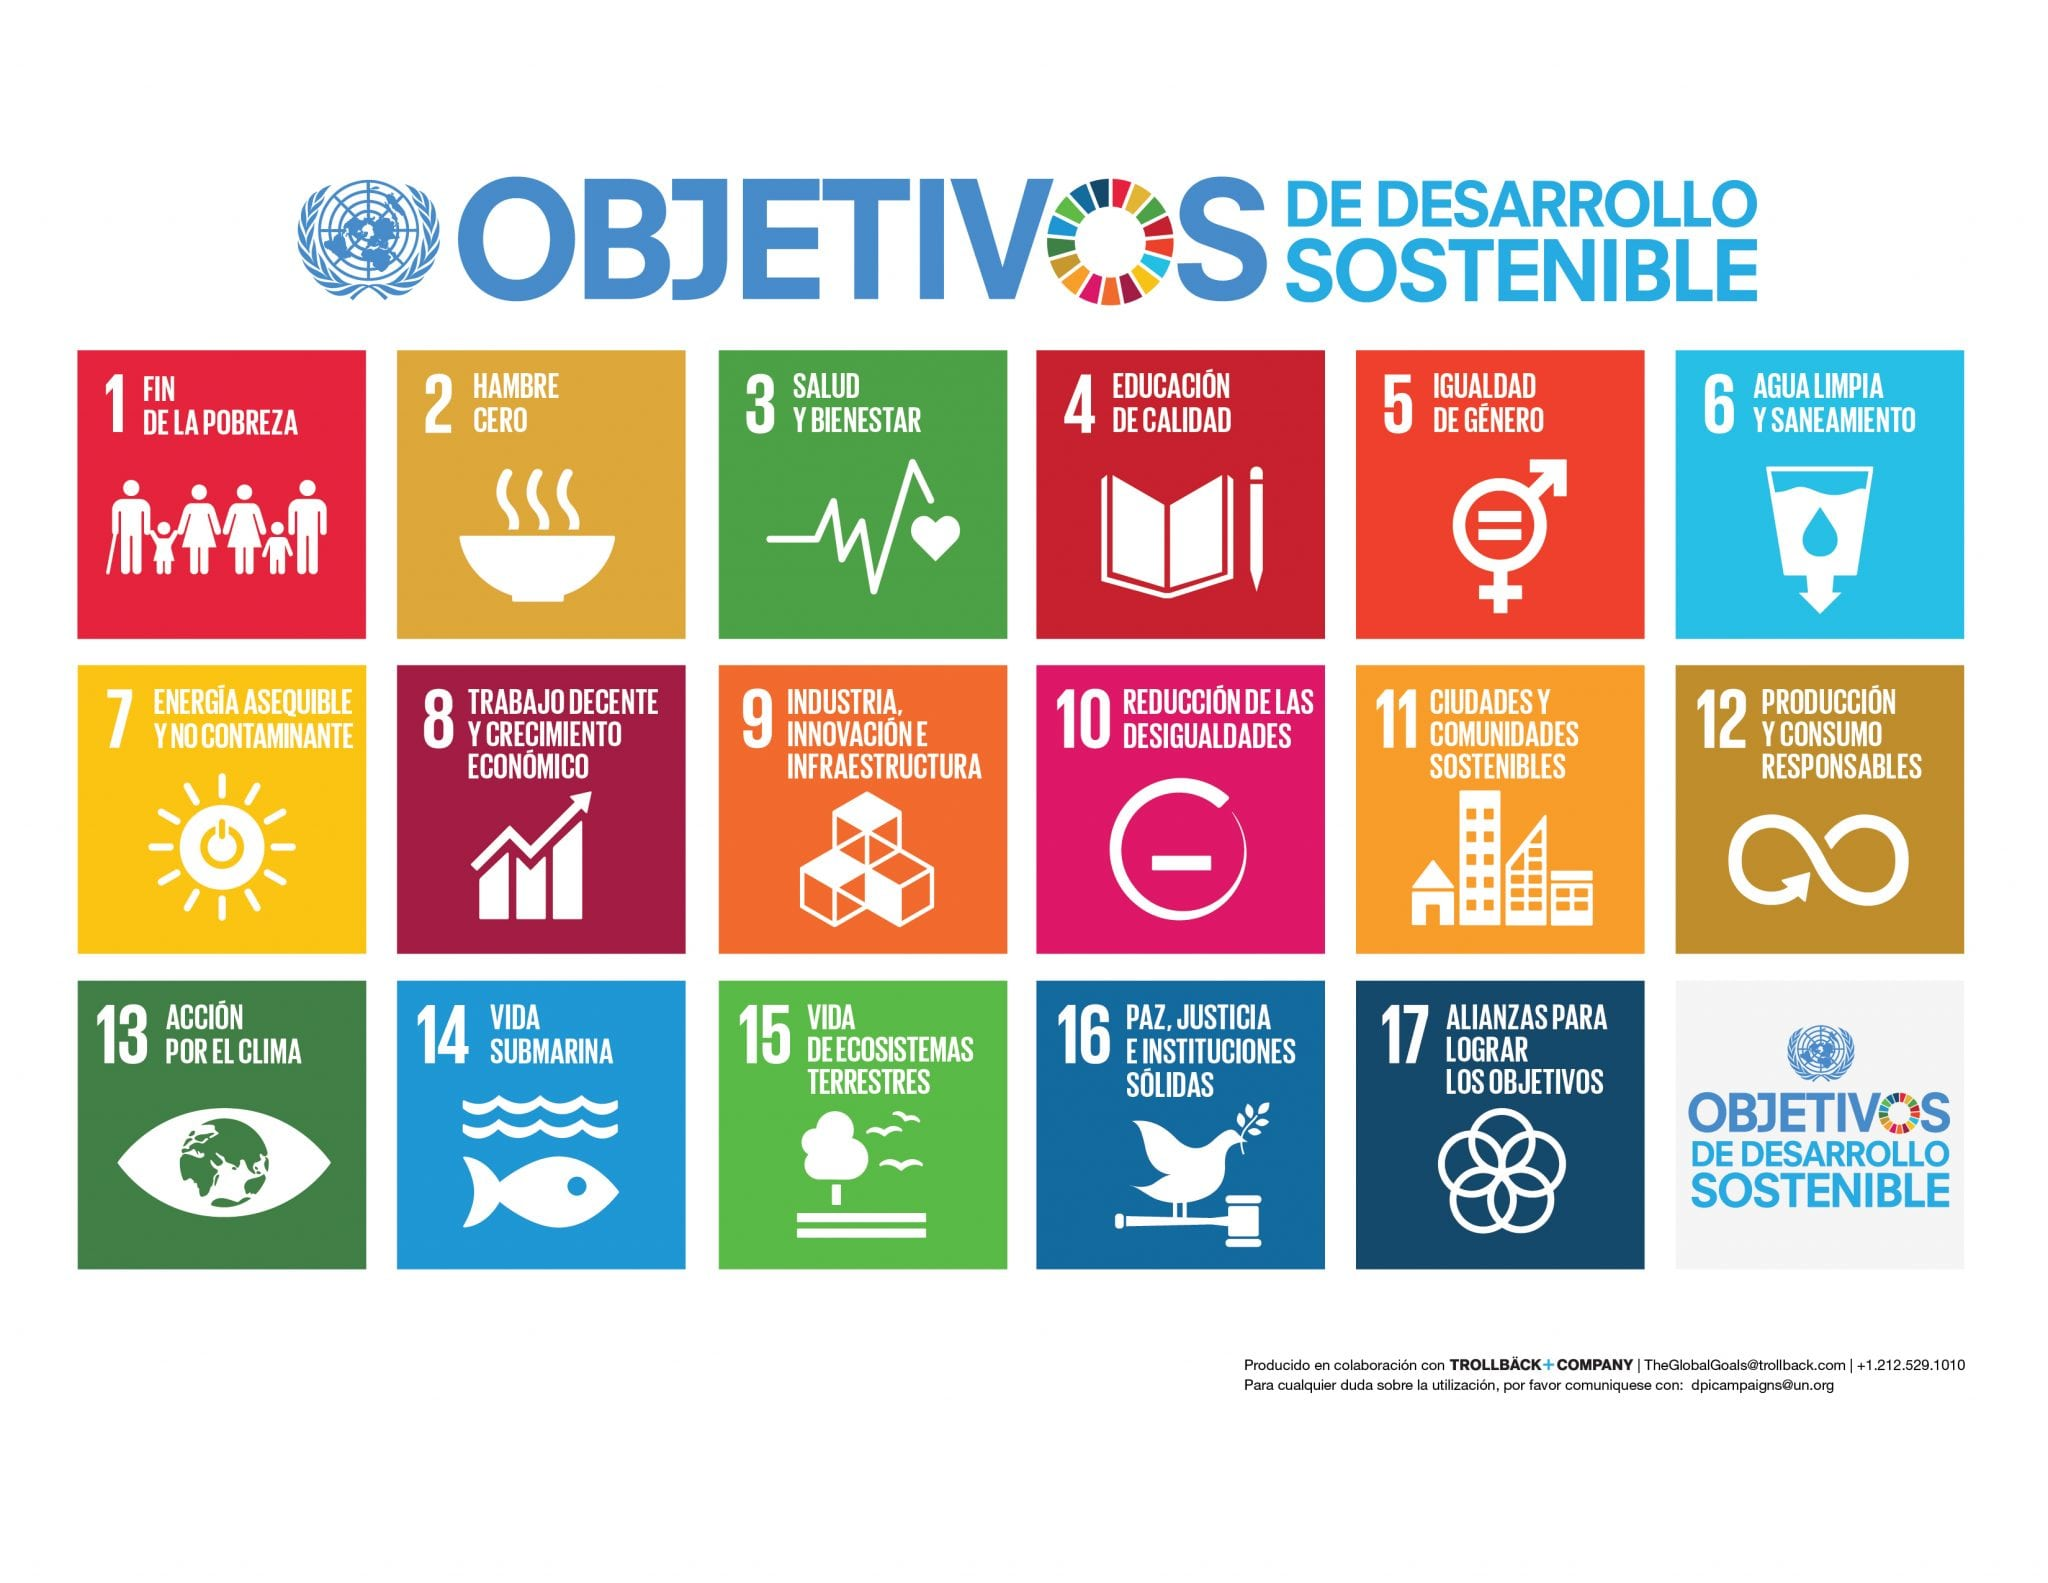

Para este proyecto abordaremos los siguientes objetivos:
- (3) Salud y Bienestar
- (4) Educación de calidad
- (5) Igualdad de género

# Etapa 1

## Objetivos

- Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.

## Problema
<p style="text-align: justify;"> Desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS. Al igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho modelo.

# 1. Instalación e importación de librerías

In [363]:
import nltk
import pandas as pd

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

pd.options.mode.chained_assignment = None

In [364]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [365]:
%pip install ftfy

In [366]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [367]:
%pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [368]:
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [369]:
%pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [370]:
%pip install pydantic-settings

Note: you may need to restart the kernel to use updated packages.


In [371]:
# Maneja contracciones que se presentan en el inglés
%pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [372]:
# Librería Natural Language Toolkit
import nltk

# Permite separar un texto en frases
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fliap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [373]:
# Descargamos el paquete de WordNetLemmatize para encontrar lemas de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fliap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [374]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
#from pandas_profiling import ProfileReport
from unidecode import unidecode

import chardet

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fliap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [375]:
# Configuramos pandas para mostrar el contenido de todas las celdas
pd.set_option('display.max_colwidth', None)

Obtenemos una lista de stopwords en español con el objetivo de usarla para eliminar palabras comunes ya que no aportan información relevante en NLP

In [376]:
stop_words = stopwords.words('spanish')

In [377]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

# 2. Perfilamiento y entendimiento de los datos

Leemos el CSV que contiene los datos

In [378]:
df = pd.read_excel('./content/ODScat_345.xlsx')

In [379]:
df.shape

(4049, 2)

In [380]:
df.sample(5)

,Textos_espanol,sdg
2080,"También ofrece capacitación vocacional para mujeres en el sector de la artesanía y mejora las habilidades técnicas de las trabajadoras en algunos sectores. De estos aprendices, se espera que entre el 10% y el 15% inicien su propio negocio. También está desarrollando módulos de formación para mujeres en Gharbia, basados ​​en el curso Know About Business (KAB) de la OIT.",5
3966,"Será importante avanzar en el aumento de los logros de aprendizaje, en particular en materias STEM (ciencia, tecnología, ingeniería y matemáticas) que están asociadas con salarios más altos, combinado con políticas para abordar las distintas barreras que enfrentan las mujeres para el empleo, incluido el cuidado infantil asequible. más igualdad de oportunidades para mujeres y niñas en Costa Rica. De manera similar, se han realizado importantes esfuerzos para atender a los estudiantes con necesidades especiales en las escuelas regulares, incluido el desarrollo de un programa vocacional adaptado para facilitar la transición al mercado laboral. Se ha prestado menos atención política a la mejora de las oportunidades de los niños y jóvenes de las comunidades de inmigrantes, muchos de los cuales enfrentan barreras significativas para acceder a la educación y otros servicios públicos.",4
972,"Brinda una idea de los recursos de atención médica disponibles y utilizados por las diversas agencias de atención médica. Por el contrario, existe acuerdo internacional sobre los criterios de inclusión y clasificación de tipos de gastos en la forma del Sistema de Cuentas de Salud (SHA) desarrollado por la organización para la Cooperación y el Desarrollo Económico (OCDE). En el norte de Noruega, los gastos per cápita son un 25-30 por ciento más altos que el promedio nacional, mientras que en el norte de Suecia y Finlandia la diferencia es inferior al 10 por ciento. Groenlandia informa un nivel más bajo de gasto en salud per cápita que Dinamarca, el único caso donde los gastos en el norte son más bajos que en el sur.",3
834,"Con la descentralización del poder político y el cambio hacia el federalismo financiero, la planificación de la asistencia sanitaria, la organización de la oferta sanitaria y el desarrollo de estrategias de calidad son en gran medida responsabilidad de las regiones a través de los departamentos regionales de sanidad. Más allá de su papel legislativo, el nivel regional también tiene funciones ejecutivas que se llevan a cabo a través del Departamento de Salud regional. Basándose en el Patto per la Salute, el Piano Sanitario Nazionale y en las necesidades sanitarias regionales, los gobiernos regionales elaboran sus propios planes regionales de salud, que también son planes trienales.",3
465,"En total, en 2016, se notificaron 30 273 casos de sarampión en los 21 aimags. A nivel mundial, el sarampión sigue siendo una de las principales causas de muerte en niños menores de 5 años, a pesar de la disponibilidad de una vacuna segura y eficaz que previene esta enfermedad mortal. Además, los estudios han demostrado que la infección por el virus del sarampión a menudo provoca neumonía o diarrea, lo que contribuye al número total de niños que mueren por causas relacionadas con el sarampión.",3


Identificamos en qué idiomas se encuentran los textos. Para esto, se agrega de manera momentánea que indica el idioma de la reseña.

In [381]:
from langdetect import detect
df['idioma'] = df['Textos_espanol'].apply(detect)

Podemos apreciar que hay un porcentaje reducido de textos en inglés y francés, estas filas serán eliminadas ya que son insignificantes

In [382]:
df['idioma'].value_counts(dropna=False, normalize=True)

idioma
es    0.996542
en    0.001976
fr    0.001482
Name: proportion, dtype: float64

Verificamos valores nulos en el DataFrame

In [383]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
idioma            0.0
dtype: float64

Verificamos valores duplicados en el Dataframe

In [384]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


## 2.1 Limpieza de datos

Se eliminan los textos en inglés y francés:

In [385]:
df = df.drop(df[df['idioma'] == 'en'].index)
df = df.drop(df[df['idioma'] == 'fr'].index)

In [386]:
df.sample(5)

,Textos_espanol,sdg,idioma
2120,"No solo se registraron casos de mujeres combatientes dispuestas (Coulter 2008), sino que las mujeres también participaron activamente en otras arenas. Muchos se convirtieron en los principales sostén de la familia cuando los hombres participaron en el esfuerzo de guerra, y también fueron fundamentales en la organización para poner fin al conflicto. Aunque al principio las mujeres no formaban parte de ningún diálogo formal sobre la paz y fueron excluidas de las principales negociaciones de paz de Abiyán en 1996 y Conakry en 1997, al menos dos representantes femeninas fueron incluidas en las conversaciones de paz celebradas en Lomé en 1999 y las El Acuerdo de Paz resultante menciona la importancia de prestar atención a las necesidades especiales de las mujeres en el contexto posterior al conflicto (Ogunsanya 2007, Barnes 2010).",5,es
3119,"En la etapa de secundaria inferior (Years 8 tolO), los profesores califican cada asignatura dos veces al año. En la secundaria superior, los profesores realizan una evaluación continua, y los alumnos se presentan a exámenes cnd-of-ycar (UNESCO. La autoridad central en materia de evaluación aconseja que la evaluación se utilice como instrumento para gestionar el aprendizaje, y no como herramienta de selección. Cada vez se hace más hincapié en la evaluación de las competencias que en la de los conocimientos y los hechos (UNESCO, 2007).",4,es
1340,"Otros fondos en la tabla, por el contrario, apoyan actividades más allá del aprendizaje de adultos (por ejemplo, los presupuestos de ANQEP, IEFP y Turismo de Portugal). Los cursos VET secundarios (cursos profissionais) están excluidos ya que representan un gran programa dirigido principalmente a jóvenes. Sin embargo, son similares a los cursos de aprendizaje que se indican en la tabla.",4,es
1835,"El capítulo también examina la coherencia y consistencia del marco de evaluación del profesorado y el funcionamiento del desarrollo profesional de los docentes. Entre otras cosas, analiza el tamaÃ±o de la plantilla docente, cÃ³mo se preparan los profesores y mejoran sus competencias mientras ejercen la profesiÃ³n (por ejemplo, preparaciÃ³n inicial, desarrollo profesional), cÃ³mo se contratan y distribuyen los profesores en los distintos centros, cÃ³mo se asignan los recursos docentes y el tiempo de enseÃ±anza a los alumnos para que respondan de forma Ã³ptima a las prioridades de mejora (por ejemplo, tamaÃ±o de las clases, ratios profesor-alumno, uso del tiempo de los profesores) y cÃ³mo se incentiva a los profesores para que rindan a un alto nivel (por ejemplo, evaluaciÃ³n, reconocimiento y compensaciÃ³n de los profesores). Esta ley, cuya aplicaciÃ³n gradual comienza en 2016 y cuya plena aplicaciÃ³n estÃ¡ prevista para 2026, establece modificaciones significativas en la gestiÃ³n de la plantilla docente en Chile. Está previsto que todos los profesores de todos los centros educativos sostenidos con fondos públicos pasen a formar parte progresivamente del Sistema de Desarrollo Profesional Docente.",4,es
713,"A través de un cuestionario, AGENAS monitorea el cumplimiento de las recomendaciones y busca comprender las barreras que encuentran las R&AP en la implementación. La atención de alta calidad es una atención que es segura, eficaz y centrada en el paciente, y nunca debe darse por sentada. Los sistemas de atención médica enfrentan enormes desafíos: necesidades y procesos de atención complejos, mayores demandas de atención médica (especialmente para afecciones crónicas) y, lo que es más importante, un panorama económico en el que los sistemas de atención médica tendrán que lograr más por menos.",3,es


Se elimina la columna 'idioma'

In [387]:
df = df.drop('idioma', axis=1)

In [388]:
df.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

### Distribución de valores en la columna *sdg*

In [389]:
df['sdg'].value_counts(dropna=False,normalize=True)

sdg
5    0.358116
4    0.335068
3    0.306815
Name: proportion, dtype: float64

Observamos que tenemos una distribución equitativa de los datos para los tres ODS

In [390]:
df['Textos_espanol'] = df['Textos_espanol'].astype(str)

### Corregimos palabras mal codificadas

In [391]:
import ftfy

def corregir_texto(texto):
  texto = ftfy.fix_text(texto)
  return texto

def corregir_manual(texto):
    if isinstance(texto, str):
        # Reemplazos para letras con tildes
        texto = texto.replace('Ã¡', 'á')  # á
        texto = texto.replace('Ã©', 'é')  # é
        texto = texto.replace('Ã­', 'í')  # í
        texto = texto.replace('Ã³', 'ó')  # ó
        texto = texto.replace('Ãº', 'ú')  # ú
        texto = texto.replace('Ã', 'Á')  # Á
        texto = texto.replace('Ã‰', 'É')  # É
        texto = texto.replace('Ã', 'Í')  # Í
        texto = texto.replace('Ã“', 'Ó')  # Ó
        texto = texto.replace('Ãš', 'Ú')  # Ú

        # Reemplazos para la ñ y Ñ
        texto = texto.replace('Ã±', 'ñ')  # ñ
        texto = texto.replace('Ã‘', 'Ñ')  # Ñ

        # Reemplazos para símbolos de comillas y otros
        texto = texto.replace('â€œ', '“')  # Comillas de apertura
        texto = texto.replace('â€', '”')  # Comillas de cierre
        texto = texto.replace('â€˜', '‘')  # Comilla simple apertura
        texto = texto.replace('â€™', '’')  # Comilla simple cierre
        texto = texto.replace('â€“', '–')  # Guion largo
        texto = texto.replace('â€¦', '…')  # Puntos suspensivos

        # Reemplazos para caracteres especiales
        texto = texto.replace('Â¿', '¿')  # ¿
        texto = texto.replace('Â¡', '¡')  # ¡
        texto = texto.replace('Â', '')    # Espacio no deseado (precede algunos caracteres)

        # Otros reemplazos posibles
        texto = texto.replace('â€œ', '"')  # Comillas dobles
        texto = texto.replace('â€', '"')   # Comillas dobles
        texto = texto.replace('â€™', "'")  # Comilla simple
        texto = texto.replace('â€“', '-')  # Guion largo
        texto = texto.replace('â€¦', '...')  # Puntos suspensivos

    return texto
# Aplicamos la función al DF
df['Textos_espanol'] = df['Textos_espanol'].apply(corregir_texto)
df['Textos_espanol'] = df['Textos_espanol'].apply(corregir_manual)


In [392]:
#df = df.applymap(corregir_manual)

In [393]:
df.sample(5)

,Textos_espanol,sdg
2922,"Allí donde las autoridades escolares no han reconocido su existencia, a menudo ha florecido y se ha institucionalizado. Se necesitan esfuerzos para empoderar a las niñas y las mujeres y para sensibilizar a los hombres sobre las necesidades y los derechos de las niñas y las mujeres (UNESCO, 2003). Cuando las escuelas están ubicadas lejos de casa, los estudiantes no pueden asistir por cuestiones de seguridad y razones económicas.",5
744,"También es notable que mientras tanto para Jamaica como para St. Luda la drástica caída en los costos del tratamiento hizo que se redujera la parte del PIB perdida, en el caso de Trinidad y Tobago sucedió lo contrario. El efecto a la baja de la caída en los costos de tratamiento fue más que compensado por el impacto al alza del aumento significativo en el número de personas infectadas. Los resultados del estudio se resumen en la Tabla 4.4, que muestra el impacto negativo del VIH/SIDA en variables macroeconómicas clave.",3
2916,"Incluso las decisiones polÃticas aparentemente neutras desde el punto de vista del género pueden tener efectos, intencionados o no, sobre las posibilidades de las mujeres de participar en la sociedad en pie de igualdad. Pueden dificultarles la búsqueda de empleo, la educación, la creación de empresas, la satisfacción de las necesidades de su familia o la garantÃa de sus derechos humanos. Por ejemplo, una normativa laboral que permita a ambos progenitores disfrutar de un permiso para cuidar de un hijo enfermo tiene más probabilidades de afectar a las mujeres como cuidadoras principales (véase el capítulo 17). Israel, por ejemplo, informa de que varias EIG mostraron cómo los deportes para hombres y niños disfrutaban de mayores subvenciones que los deportes para mujeres y niñas a nivel nacional y local (Swirski, 2011). Este tipo de análisis puede realizarse durante la fase de diseño de una ley o reglamento (ex ante) y/o durante las evaluaciones de los impactos de las leyes, reglamentos y programas aplicados (ex post).",5
277,"La elasticidad del gasto en salud al PIB es de 0,8. La evolución de los precios y la tecnología sanitaria es un factor determinante importante del crecimiento del gasto sanitario. De la Maisonneuve y Oliveira Martins (2013) muestran que para los países de la OCDE explican alrededor del 50 % de la variación del gasto público en salud desde la década de 1990 hasta finales de la década de 2000 y el 40 % para los países BRIICS.",3
3300,"Si se interpretan correctamente, estos datos también deberían revelar la relación entre el trabajo informal y el cuidado de los hijos. Del mismo modo, los datos más generales sobre el uso del tiempo deben tenerse en cuenta en los programas públicos de empleo, garantizando que las políticas necesarias para acomodar la situación de las mujeres no tiendan a reforzar los roles de género y a mantener la actual distribución del uso del tiempo en los hogares. Además, estos datos deben proporcionar al Estado la información que necesita para fomentar una mayor participación de los hombres en el cuidado y la crianza de los hijos, por ejemplo mediante el permiso de paternidad, que forma parte de la política de regulación laboral. El empleo es lo que da acceso a la seguridad social en América Latina, y perjudica a las mujeres en el mercado laboral porque el tiempo que dedican al trabajo no remunerado también socava su posición en la seguridad social. El valor económico promedio que genera mensualmente un ama de casa por su trabajo no remunerado debería sustentar dicha integración (UNESCAP, 2004).",5


### Eliminamos caracteres especiales y puntuación

In [394]:
#pip show inflect

In [395]:
import re
import unicodedata
import inflect
from nltk.corpus import stopwords

stopwords_espaniol = set(stopwords.words('spanish'))

def eliminar_no_ascii(palabras):
  nuevas_palabras = []
  for palabra in palabras:
    nueva_palabra = unicodedata.normalize('NFKD', palabra).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    nuevas_palabras.append(nueva_palabra)
  return nuevas_palabras

def a_minusculas(palabras):
  nuevas_palabras = [palabra.lower() for palabra in palabras]
  return nuevas_palabras

def remover_puntuacion(palabras):
  nuevas_palabras = []
  for palabra in palabras:
    nueva_palabra = re.sub(r'[^\w\s]', '', palabra)
    if nueva_palabra != '':
      nuevas_palabras.append(nueva_palabra)
  return nuevas_palabras

def reemplazar_numeros(palabras):
  p = inflect.engine()
  nuevas_palabras = []
  for palabra in palabras:
    if palabra.isdigit():
      nuevas_palabras.append(p.number_to_words(palabra))
    else:
      nuevas_palabras.append(palabra)
  return nuevas_palabras

def eliminar_stopwords(palabras):
  nuevas_palabras = []
  for palabra in palabras:
    if palabra not in stopwords_espaniol:
      nuevas_palabras.append(palabra)
  return nuevas_palabras

def procesamiento(palabras):
  palabras = eliminar_no_ascii(palabras)
  palabras = a_minusculas(palabras)
  palabras = remover_puntuacion(palabras)
  palabras = reemplazar_numeros(palabras)
  palabras = eliminar_stopwords(palabras)
  return palabras

### Tokenizacion

In [396]:
# Corregimos contracciones
df['Textos_espanol'] = df['Textos_espanol'].apply(contractions.fix)

In [397]:
# Eliminamos ruido
df['words'] = df['Textos_espanol'].apply(word_tokenize).apply(procesamiento)
df.head()

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirty-eight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirty-three, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, three, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, fifty-six, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes

### Normalización del texto

In [398]:
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def obtener_raices(palabras):
  raices = [stemmer.stem(palabra) for palabra in palabras]
  return raices

def lematizar_verbos(palabras):
    # Lematizar los verbos
    lemas = []
    for palabra in palabras:
          lema = lemmatizer.lemmatize(palabra)
          lemas.append(lema)
    return lemas

def raices_y_lemas(palabras):
    raices = obtener_raices(palabras)
    lemas = lematizar_verbos(raices)
    return lemas

In [399]:
# Verificamos la correción
df['words'] = df['words'].apply(raices_y_lemas)
df.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consulta, externa, especialista, three hundred and nineteen, cad, mil, derechohaby, sp, comparac, three hundred and thirty-eight, six hundred and twenty, cad, mil, derechohaby, imss, issst, respectiva, si, bien, diferencia, pued, reflej, necesidad, desig, poblac, ligera, may, issst, pued, justificars, maner, numero, receta, pudieron, ser, surtida, totalidad, farmaceutico, debido, falt, existencia, thirty-three, dentro, sp, comparac, fourteen, dentro, imss, segun, dato, encuest, aunqu, propia, cifra, instituto, s, sugy, tasa, ma, alta, receta, surtida, amba, cifra, encu, ma, alta, ocd, gasto, bolsillo, reducido, significativa, ultim, decad, pe, esfuerzo, logr, cobertur, sanitar, univers, trav, reform, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, cent, financio, directa, solo, three, gasto, tot, salud, realizo, transferencia, especifica, gasto, salud, ascendieron, fifty-six, gasto, tot, may, part, gasto, presupuestario, salud, real, gobierno, condado, condado, pobr, solo, pued, ofrec, bajo, nivel, at, poblac, loc, gobierno, provint, proporcion, subsidio, lado, ofert, hospit]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[clara, fact, juego, particul, variedad, barrera, determin, soc, pued, relacionado, genero, clas, etn, cast, idiom, relig, surg, estructura, norma, proceso, soc, arraigado, aceiv, incluso, fom, distribuc, injusta, riquez, recurs

Analizamos las palabras identificadas para relacionar las opiniones con los ODS y posibles estrategias que la organización debe plantear.

In [400]:
# Combinamos todas las palabras en un solo conjunto para análisis general
todas_palabras = [palabra for lista_palabras in df['words'] for palabra in lista_palabras]

# Creamos un conteo de las palabras más frecuentes
from collections import Counter
contador_palabras = Counter(todas_palabras)

# Vemos las 20 palabras más frecuentes en todo el conjunto de datos
palabras_mas_frecuentes = contador_palabras.most_common(20)

In [401]:
palabras_mas_frecuentes

[('muj', 3333),
 ('ma', 2807),
 ('salud', 1676),
 ('genero', 1651),
 ('pued', 1620),
 ('educac', 1503),
 ('pais', 1406),
 ('at', 1338),
 ('tamby', 1295),
 ('ano', 1054),
 ('nivel', 1052),
 ('estudy', 1015),
 ('servicio', 1006),
 ('ocd', 977),
 ('profes', 971),
 ('hombr', 866),
 ('deb', 844),
 ('may', 836),
 ('nac', 825),
 ('resultado', 786)]

Relacionamos las palabras con el ODS específico

In [402]:
# Filtrar las palabras relacionadas con el ODS 3
palabras_ods_3 = [palabra for lista_palabras in df[df['sdg'] == 3]['words'] for palabra in lista_palabras]

# Contar las palabras más comunes para este ODS
contador_palabras_ods_3 = Counter(palabras_ods_3)

In [403]:
contador_palabras_ods_3.most_common(20)

[('salud', 1521),
 ('at', 1172),
 ('ma', 906),
 ('servicio', 683),
 ('pais', 475),
 ('pacy', 470),
 ('ment', 416),
 ('tamby', 401),
 ('pued', 395),
 ('enfermedad', 393),
 ('ano', 390),
 ('medico', 375),
 ('calidad', 333),
 ('primar', 330),
 ('sistem', 324),
 ('nac', 321),
 ('persona', 308),
 ('ocd', 302),
 ('may', 300),
 ('nivel', 291)]

In [404]:
# Filtrar las palabras relacionadas con el ODS 4
palabras_ods_4 = [palabra for lista_palabras in df[df['sdg'] == 4]['words'] for palabra in lista_palabras]

# Contar las palabras más comunes para este ODS
contador_palabras_ods_4 = Counter(palabras_ods_4)

In [405]:
contador_palabras_ods_4.most_common(20)

[('educac', 1202),
 ('estudy', 976),
 ('ma', 910),
 ('profes', 766),
 ('escuela', 716),
 ('doc', 610),
 ('escol', 578),
 ('pued', 548),
 ('aprendizas', 527),
 ('evaluac', 516),
 ('nivel', 465),
 ('ocd', 444),
 ('ano', 432),
 ('alumno', 430),
 ('pais', 417),
 ('tamby', 403),
 ('escuel', 401),
 ('supery', 367),
 ('desarrollo', 357),
 ('resultado', 346)]

In [406]:
# Filtrar las palabras relacionadas con el ODS 5
palabras_ods_5 = [palabra for lista_palabras in df[df['sdg'] == 5]['words'] for palabra in lista_palabras]

# Contar las palabras más comunes para este ODS
contador_palabras_ods_5 = Counter(palabras_ods_5)

In [407]:
contador_palabras_ods_5.most_common(20)

[('muj', 3160),
 ('genero', 1618),
 ('ma', 991),
 ('hombr', 765),
 ('pued', 677),
 ('igualdad', 560),
 ('trabajo', 536),
 ('derecho', 526),
 ('pais', 514),
 ('tamby', 491),
 ('soc', 402),
 ('lab', 356),
 ('violenc', 344),
 ('politica', 341),
 ('participac', 319),
 ('may', 314),
 ('tiempo', 297),
 ('nivel', 296),
 ('ejemplo', 290),
 ('est', 279)]

Visualización en nube de palabras

In [408]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

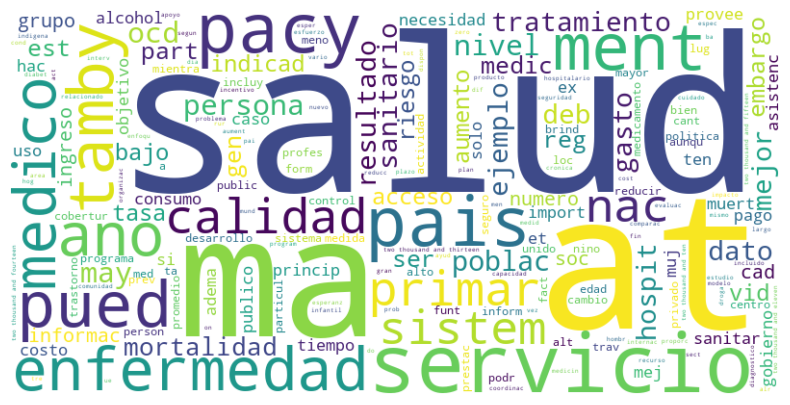

In [409]:
# Generamos nube de palabras para ODS 3
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador_palabras_ods_3)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

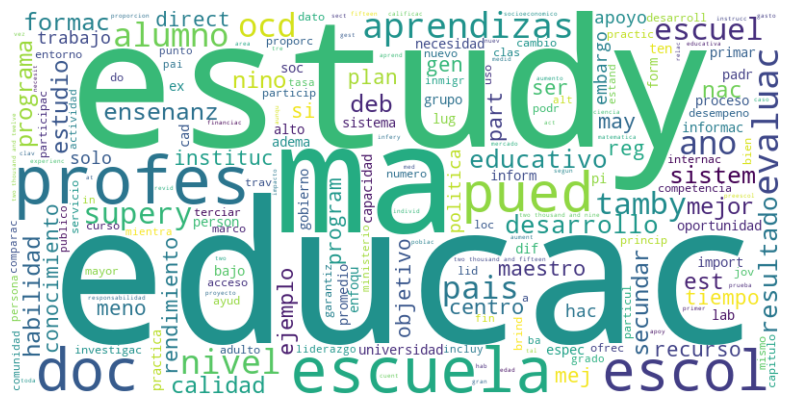

In [410]:
# Generamos nube de palabras para ODS 4
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador_palabras_ods_4)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

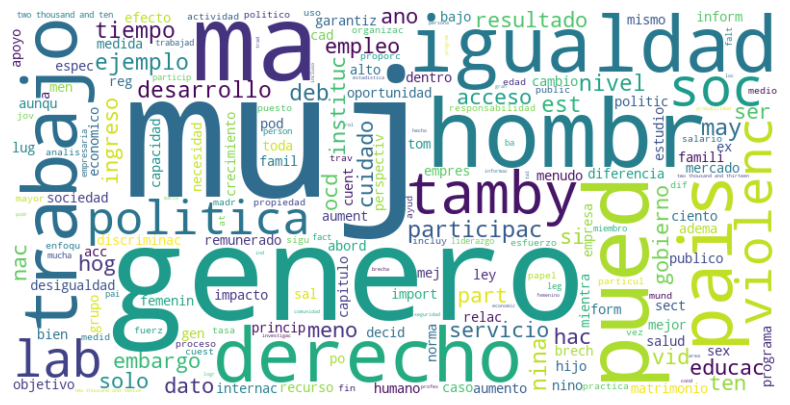

In [411]:
# Generamos nube de palabras para ODS 5
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador_palabras_ods_5)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Convertimos la columna *words*, la cual contiene listas de elementos, en una sola cadea de texto donde los elementos de la lista estarán separados por espacion en blanco

In [412]:
df['words'] = df['words'].apply(lambda x: ' '.join(map(str,x)))
df

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo numero consulta externa especialista three hundred and nineteen cad mil derechohaby sp comparac three hundred and thirty-eight six hundred and twenty cad mil derechohaby imss issst respectiva si bien diferencia pued reflej necesidad desig poblac ligera may issst pued justificars maner numero receta pudieron ser surtida totalidad farmaceutico debido falt existencia thirty-three dentro sp comparac fourteen dentro imss segun dato encuest aunqu propia cifra instituto s sugy tasa ma alta receta surtida amba cifra encu ma alta ocd gasto bolsillo reducido significativa ultim decad pe esfuerzo logr cobertur sanitar univers trav reform sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,two thousand and seven gobierno cent financio directa solo three gasto tot salud realizo transferencia especifica gasto salud ascendieron fifty-six gasto tot may part gasto presupuestario salud real gobierno condado condado pobr solo pued ofrec bajo nivel at poblac loc gobierno provint proporcion subsidio lado ofert hospit
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,clara fact juego particul variedad barrera determin soc pued relacionado genero clas etn cast idiom relig surg estructura norma proceso soc arraigado aceiv incluso fom distribuc injusta riquez recurso soc ejemplo persona viv vih enfermedad cronica enfr alto nivel estigm discriminac dificult acceso prueba medica tratamiento at apoyo gobierno busc mejor estand sal

Guardamos el DataFrame en un archivo CSV

In [413]:
new_df = df[['Textos_espanol', 'words', 'sdg']]
new_df.to_csv('./content/df_procesado.csv', index=False)

# 3. Modelado y evaluación

## 3.1 Random Forest - Germán Rojas

Random Forest es un algoritmo de aprendizaje supervisado que se utiliza tanto para la clasificación como para la regresión. Este algoritmo se basa en la combinación de múltiples árboles de decisión, donde cada árbol se entrena con una submuestra aleatoria del conjunto de datos de entrenamiento. Durante la predicción, el algoritmo promedia las predicciones de todos los árboles de decisión para obtener la salida final.

Random Forest se puede utilizar en la clasificación de un texto según los ODS porque es capaz de manejar múltiples características de texto (como BoW, TF-IDF y HashingVectorizer) al mismo tiempo, lo que puede mejorar el rendimiento en la clasificación. Además, al combinar múltiples árboles de decisión, Random Forest reduce el riesgo de sobreajuste y mejora la generalización del modelo a nuevos datos. En resumen, Random Forest puede ser útil para entrenar modelos de clasificación de texto según los ODS porque puede manejar múltiples características de texto, reduce el riesgo de sobreajuste y mejora la generalización del modelo a nuevos datos.

In [414]:
from sklearn.ensemble import RandomForestClassifier

### Separación de datos

In [415]:
data = df.copy()

In [416]:
X_train, X_test, y_train, y_test = train_test_split(data[['words']], data['sdg'], random_state=42, stratify=data['sdg'], test_size=0.2)

In [417]:
X_train.shape, X_test.shape

((3228, 1), (807, 1))

In [418]:
y_train.head()

2487    5
2888    5
1035    4
4018    5
2521    5
Name: sdg, dtype: int64

Verificamos que se mantenga una proporción similar a la original

In [419]:
pd.Series(y_train).value_counts(normalize=True)

sdg
5    0.358116
4    0.335192
3    0.306691
Name: proportion, dtype: float64

In [420]:
pd.Series(y_test).value_counts(normalize=True)

sdg
5    0.358116
4    0.334572
3    0.307311
Name: proportion, dtype: float64

### Vectorización del texto

Usaremos el TfidfVectorizer para crear una matriz de términos de frecuencia inversa de documentos (TF-IDF) a partir del conjunto de datos de entrenamiento (X_train). La finalidad de utilizar TF-IDF es dar más peso a las palabras que son importantes para el documento, lo que ayuda a mejorar la calidad de las predicciones.

In [421]:
texts = X_train['words']

tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,
                                   stop_words=stop_words,
                                   lowercase=True)

X_tfidf = tfidf_vectorizer.fit_transform(texts)
X_tfidf.shape

c:\Users\fliap\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3228, 13184)

In [422]:
print(f'Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}')

Vocabulary size: 13184


In [423]:
tfidf_model_best = RandomForestClassifier(random_state=7)

print("Shape de X_tfidf:", X_tfidf.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train.head(10))  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test.head(10))    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (3228, 13184)
Shape de y_train: (3228,)
Shape de y_test: (807,)
Ejemplos de y_train: 2487    5
2888    5
1035    4
4018    5
2521    5
3228    3
2679    5
653     3
837     3
1000    4
Name: sdg, dtype: int64
Ejemplos de y_test: 4043    5
594     3
3192    3
1036    4
2870    5
3044    5
2699    5
1999    4
551     3
2561    5
Name: sdg, dtype: int64


In [424]:
tfidf_model_best.fit(X_tfidf, y_train)
import joblib
joblib.dump(tfidf_model_best, './content/tfidf_model_best.pkl')

['./content/tfidf_model_best.pkl']

Mostramos un gráfico de barras horizontal para mostrar la importancia de cada característica en la predicción del modelo.

<Axes: >

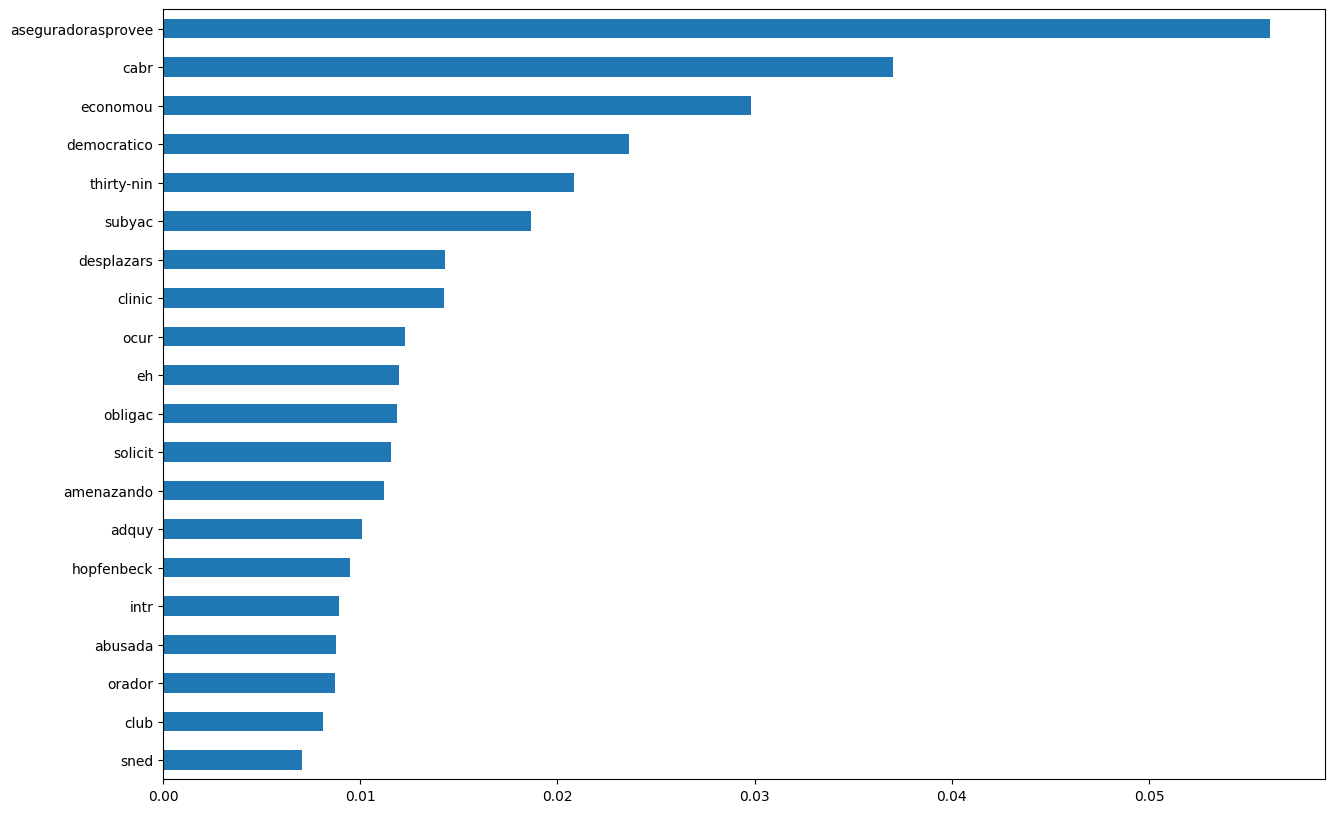

In [425]:
pd.Series(tfidf_model_best.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

Se muestra la cantidad de árboles en el modelo y la profundidad promedio de los árboles en el modelo. Finalmente, se hace una predicción en los datos de entrenamiento y en los datos de prueba. El propósito de esto es evaluar el rendimiento del modelo y su capacidad para generalizar en datos nuevos.

In [426]:
tfidf_estimators = tfidf_model_best.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 96.36


In [427]:
# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model_best.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model_best.predict(tfidf_vectorizer.transform(X_test["words"]))

### Evaluación cuantitativa

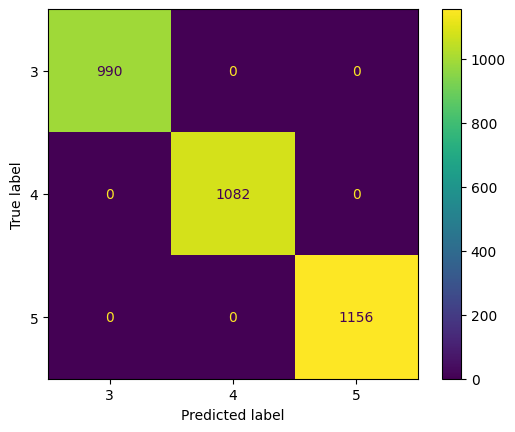

In [428]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

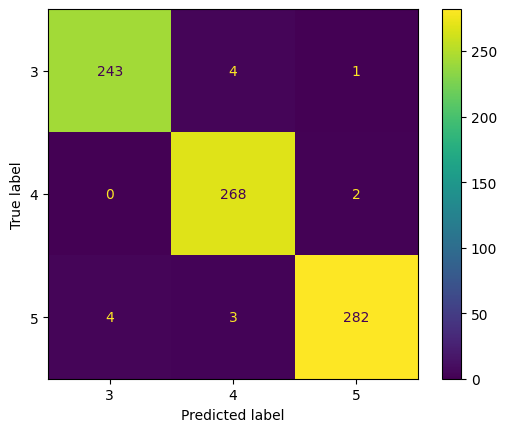

In [429]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

### Métricas DataFrame de entrenamiento

Estos resultados indican que el modelo de clasificación de Random Forest basado en TF-IDF logró clasificar correctamente todos los casos en el conjunto de entrenamiento. La precisión, recall y F1-score son todas iguales a 1. Esto implica que el modelo es muy preciso en predecir la clase correcta y no hay falsos positivos ni falsos negativos.

In [430]:
print("Precision (micro):", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision (micro): 1.0
Recall (micro): 1.0
F1 (micro): 1.0


In [431]:
print("Precision (macro):", precision_score(y_train, y_train_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_train, y_train_tfidf_predict, average='macro'))

Precision (macro): 1.0
Recall (macro): 1.0
F1 (macro): 1.0


In [432]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


### Métricas DataFrame de prueba

Estos resultados corresponden a la evaluación del modelo de clasificación basado en TF-IDF en el conjunto de prueba. La precisión, recall y F1-score obtenidos son 0.98, 0.98 y 0.98, respectivamente. La precisión indica la proporción de verdaderos positivos entre los ejemplos clasificados como positivos, mientras que el recall mide la proporción de verdaderos positivos que han sido correctamente identificados por el modelo. El F1-score es una medida que combina la precisión y el recall para obtener una medida general de la calidad de la clasificación.

En este caso, los resultados indican que el modelo tiene una buena precisión y recall, lo que sugiere que es capaz de identificar correctamente la mayoría de los textos según ODS en el conjunto de prueba.

In [433]:
print("Precision (micro):", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision (micro): 0.9826517967781908
Recall (micro): 0.9826517967781908
F1 (micro): 0.9826517967781908


In [434]:
print("Precision (macro):", precision_score(y_test, y_test_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_test, y_test_tfidf_predict, average='macro'))

Precision (macro): 0.9826082689240584
Recall (macro): 0.9827366163276049
F1 (macro): 0.9826276058542783


In [435]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.982737265343409
Recall (weighted): 0.9826517967781908
F1 (weighted): 0.9826485133692737


In [436]:
print(classification_report(y_test, y_test_tfidf_predict))

              precision    recall  f1-score   support

           3       0.98      0.98      0.98       248
           4       0.97      0.99      0.98       270
           5       0.99      0.98      0.98       289

    accuracy                           0.98       807
   macro avg       0.98      0.98      0.98       807
weighted avg       0.98      0.98      0.98       807



### Validación cruzada

El valor obtenido en la validación cruzada de 0.969 indica que el modelo de clasificación de texto usando TF-IDF como representación de características tiene un buen desempeño en términos de la precisión general en la predicción de las clases.

In [437]:
from sklearn.model_selection import cross_val_score

In [438]:
# Validación cruzada con 5 iteraciones
cv_scores = cross_val_score(tfidf_model_best, X_tfidf, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.97058824 0.97832817 0.97678019 0.97829457 0.97364341]
Mean cross-validation score: 0.9755269157846737


### Creación pipe line


In [439]:
modelo_cargado = joblib.load('./content/tfidf_model_best.pkl')

In [440]:
X_train_2 = X_train
X_test_2 = X_test
y_train_2 = y_train
y_test_2 = y_test

In [441]:
import ftfy
import re
import unicodedata
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

stopwords_espaniol = set(stopwords.words('spanish'))
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def corregir_texto(texto):
    return ftfy.fix_text(texto)

def corregir_manual(texto):
    # Reemplazos de caracteres especiales y tildes
    if isinstance(texto, str):
        texto = texto.replace('Ã¡', 'á').replace('Ã©', 'é').replace('Ã­', 'í')
        texto = texto.replace('Ã³', 'ó').replace('Ãº', 'ú').replace('Ã', 'Á')
        texto = texto.replace('Ã‰', 'É').replace('Ã', 'Í').replace('Ã“', 'Ó')
        texto = texto.replace('Ãš', 'Ú').replace('Ã±', 'ñ').replace('Ã‘', 'Ñ')
        texto = texto.replace('â€œ', '“').replace('â€', '”').replace('â€˜', '‘')
        texto = texto.replace('â€™', '’').replace('â€“', '–').replace('â€¦', '…')
        texto = texto.replace('Â¿', '¿').replace('Â¡', '¡').replace('Â', '')
        texto = texto.replace('â€œ', '"').replace('â€', '"').replace('â€™', "'")
        texto = texto.replace('â€“', '-').replace('â€¦', '...')
    return texto

def eliminar_no_ascii(palabras):
    return [unicodedata.normalize('NFKD', palabra).encode('ascii', 'ignore').decode('utf-8', 'ignore') for palabra in palabras]

def a_minusculas(palabras):
    return [palabra.lower() for palabra in palabras]

def remover_puntuacion(palabras):
    return [re.sub(r'[^\w\s]', '', palabra) for palabra in palabras if palabra != '']

def reemplazar_numeros(palabras):
    p = inflect.engine()
    return [p.number_to_words(palabra) if palabra.isdigit() else palabra for palabra in palabras]

def eliminar_stopwords(palabras):
    return [palabra for palabra in palabras if palabra not in stopwords_espaniol]

def obtener_raices(palabras):
    return [stemmer.stem(palabra) for palabra in palabras]

def lematizar_verbos(palabras):
    return [lemmatizer.lemmatize(palabra) for palabra in palabras]

def procesamiento_completo(texto):
    # Corregir y limpiar el texto
    texto = corregir_texto(texto)
    texto = corregir_manual(texto)
    # Tokenizar y aplicar las funciones de procesamiento
    palabras = word_tokenize(texto)
    palabras = eliminar_no_ascii(palabras)
    palabras = a_minusculas(palabras)
    palabras = remover_puntuacion(palabras)
    palabras = reemplazar_numeros(palabras)
    palabras = eliminar_stopwords(palabras)
    palabras = obtener_raices(palabras)
    palabras = lematizar_verbos(palabras)
    return ' '.join(palabras)  # Devuelve el texto procesado como una cadena



In [442]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
import joblib
from text_preprocessing import aplicar_procesamiento


# Usar FunctionTransformer para aplicar procesamiento_completo
procesamiento_transformer = FunctionTransformer(aplicar_procesamiento)

In [443]:
parametros_2 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 300,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [444]:
pipeline_2 = Pipeline(steps=[
    ("procesamiento", procesamiento_transformer),
    ("vectorizer", parametros_2["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_2["classifier__n_estimators"],
        criterion=parametros_2["classifier__criterion"],
        max_depth=parametros_2["classifier__max_depth"],
        random_state=4
    ))
])

In [445]:
# Entrenamiento del modelo con los datos
pipeline_2.fit(df['Textos_espanol'], df['sdg'])

c:\Users\fliap\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('procesamiento',
                 FunctionTransformer(func=<function aplicar_procesamiento at 0x000001A9B07949D0>)),
                ('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x000001A98FB1C820>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=300,
                                        random_state=4))])

In [446]:
joblib.dump(pipeline_2, 'pipeline_2.pkl')

['pipeline_2.pkl']

In [447]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_2 = pipeline_2.predict(X_train_2["words"])
y_test_predict_2 = pipeline_2.predict(X_test_2["words"])

In [448]:
print("Precision (weighted):", precision_score(y_train_2, y_train_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_train_2, y_train_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_train_2, y_train_predict_2, average='weighted'))

Precision (weighted): 0.9978341453124723
Recall (weighted): 0.9978314745972738
F1 (weighted): 0.9978315669099356


In [449]:
print("Precision (weighted):", precision_score(y_test_2, y_test_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_test_2, y_test_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_test_2, y_test_predict_2, average='weighted'))

Precision (weighted): 0.9987654151634453
Recall (weighted): 0.9987608426270136
F1 (weighted): 0.9987609140809062


In [365]:
%pip freeze > all_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [366]:
# Lista de bibliotecas preinstaladas en Google Colab
preinstalled_packages = [
    "absl-py",
    "aiohttp",
    "alabaster",
    "altair",
    "argon2-cffi",
    "astor",
    "async-generator",
    "attrs",
    "audioread",
    "autograd",
    "Babel",
    "beautifulsoup4",
    "bleach",
    "cachetools",
    "certifi",
    "cffi",
    "chardet",
    "charset-normalizer",
    "click",
    "cloudpickle",
    "clyent",
    "colorama",
    "conda",
    "coverage",
    "cryptography",
    "curl",
    "cycler",
    "Cython",
    "decorator",
    "defusedxml",
    "dill",
    "docutils",
    "entrypoints",
    "Flask",
    "gast",
    "gitdb",
    "GitPython",
    "google",
    "google-auth",
    "google-auth-oauthlib",
    "google-pandas",
    "google-cloud",
    "google-cloud-storage",
    "google-colab",
    "grpcio",
    "h5py",
    "idna",
    "imageio",
    "importlib-metadata",
    "importlib-resources",
    "ipykernel",
    "ipython",
    "ipython-genutils",
    "jedi",
    "Jinja2",
    "joblib",
    "jsonschema",
    "jupyter-client",
    "jupyter-console",
    "jupyter-core",
    "Keras-Preprocessing",
    "kiwisolver",
    "Markdown",
    "MarkupSafe",
    "matplotlib",
    "mistune",
    "nbconvert",
    "nbformat",
    "networkx",
    "notebook",
    "numpy",
    "oauth2client",
    "opencv-python",
    "opt-einsum",
    "pandas",
    "Pillow",
    "pip",
    "plotly",
    "prometheus-client",
    "promise",
    "protobuf",
    "psutil",
    "pyasn1",
    "pyasn1-modules",
    "pycparser",
    "pydot",
    "pyparsing",
    "python-dateutil",
    "pytz",
    "PyYAML",
    "requests",
    "requests-oauthlib",
    "rsa",
    "scikit-learn",
    "scipy",
    "seaborn",
    "setuptools",
    "six",
    "soupsieve",
    "sphinx",
    "sphinxcontrib-applehelp",
    "sphinxcontrib-devhelp",
    "sphinxcontrib-htmlhelp",
    "sphinxcontrib-jsmath",
    "sphinxcontrib-svg2pdfconverter",
    "tensorboard",
    "tensorflow",
    "tensorflow-estimator",
    "tensorflow-gpu",
    "termcolor",
    "tqdm",
    "traitlets",
    "urllib3",
    "virtualenv",
    "wcwidth",
    "webencodings",
    "Werkzeug",
    "wrapt"
]

# Lee las bibliotecas instaladas
with open('all_requirements.txt', 'r') as f:
    installed_packages = f.readlines()

# Filtra las bibliotecas preinstaladas
filtered_packages = [
    pkg for pkg in installed_packages if not any(preinstalled in pkg for preinstalled in preinstalled_packages)
]

# Guarda las bibliotecas filtradas en requirements.txt
with open('requirements.txt', 'w') as f:
    f.writelines(filtered_packages)

print("El archivo 'requirements.txt' ha sido creado.")

El archivo 'requirements.txt' ha sido creado.


## 3.2 SVM - Juan Diego Sarmiento Sánchez


Una Suport Vector Machine (SVM) es un modelo de aprendizaje basado en funciones lineales automático capaz de realizar clasificación, regresión y detección de novedades lineales o no lineales. Las SVM destacan con conjuntos de datos no lineales de tamaño pequeño y mediano (es decir, de cientos a miles de instancias), especialmente para tareas de clasificación.

In [367]:
X = df['words']
y = df['sdg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [368]:
#Creamos una pipelinea para vectorización y para la SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

In [369]:

# Se define los hiperparámetros a ajustar

param_grid = {
    'tfidf__max_features': [1000, 2000],    # Número máximo de características en TF-IDF
    'svm__C': [0.1, 1, 10, 100],      #Regularización de SVM
    'svm__kernel': ['linear', 'rbf'],     #Kernel lineal o RBF
    'svm__gamma': ['scale', 'auto']       # Parámetro gamma (para RBF)
}
# Búsqueda de los mejores hiperparámetros con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenamos el modelo con los hiperparámetros
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}


Vemos los resultados de todos los parámetros:

In [370]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,param_tfidf__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,9.332093,0.885483,1.230102,0.076387,100,scale,rbf,2000,"{'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}",0.980531,0.968142,0.980531,0.978761,0.992908,0.980174,0.007864,1
19,9.118636,1.147391,1.414745,0.158238,10,scale,rbf,2000,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}",0.980531,0.968142,0.980531,0.978761,0.992908,0.980174,0.007864,1
11,8.609187,0.721330,1.245576,0.227313,1,scale,rbf,2000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}",0.980531,0.969912,0.982301,0.975221,0.991135,0.979820,0.007128,3
9,4.046431,0.444360,0.903738,0.193706,1,scale,linear,2000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear', 'tfidf__max_features': 2000}",0.976991,0.969912,0.976991,0.975221,0.991135,0.978050,0.007038,4
13,3.598053,0.311527,0.910236,0.217030,1,auto,linear,2000,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'linear', 'tfidf__max_features': 2000}",0.976991,0.969912,0.976991,0.975221,0.991135,0.978050,0.007038,4
10,5.644991,0.522392,0.980809,0.131228,1,scale,rbf,1000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 1000}",0.976991,0.966372,0.978761,0.975221,0.991135,0.977696,0.007957,6
8,3.102060,0.453291,0.672504,0.113268,1,scale,linear,1000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear', 'tfidf__max_features': 1000}",0.975221,0.969912,0.973451,0.975221,0.989362,0.976633,0.006653,7
12,2.773490,0.194084,0.599936,0.105780,1,auto,linear,1000,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'linear', 'tfidf__max_features': 1000}",0.975221,0.969912,0.973451,0.975221,0.989362,0.976633,0.006653,7
26,7.554228,0.681037,1.206595,0.244734,100,scale,rbf,1000,"{'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 1000}",0.975221,0.961062,0.978761,0.969912,0.992908,0.975573,0.010521,9
18,7.077669,0.669581,0.977288,0.045011,10,scale,rbf,1000,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 1000}",0.975221,0.961062,0.978761,0.969912,0.992908,0.975573,0.010521,9


In [371]:
#Estimamos con el modelo ya cargado
y_pred = grid_search.best_estimator_.predict(X_test)


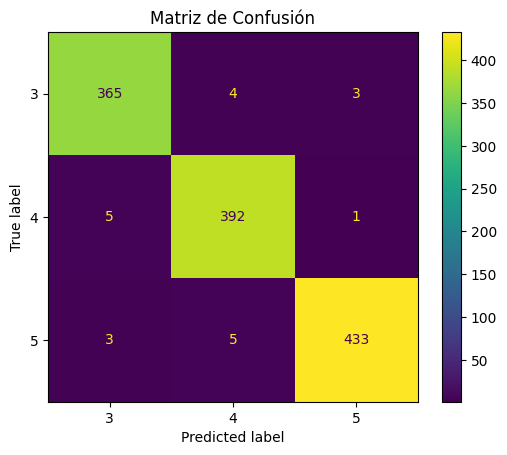

In [372]:
#Vemos la matriz de confución sin normalizar
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=grid_search.best_estimator_.classes_
)

disp.ax_.set_title('Matriz de Confusión')
plt.show()

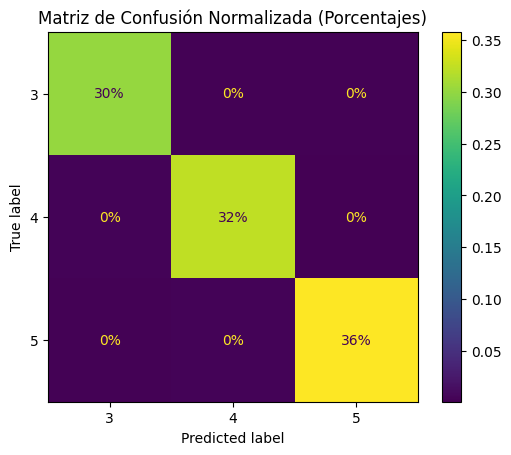

In [373]:
#Vemos la matriz de confución normalizada
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    normalize='all',
    values_format=".0%",
    display_labels=grid_search.best_estimator_.classes_
)

disp.ax_.set_title('Matriz de Confusión Normalizada (Porcentajes)')
plt.show()

In [374]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.98      0.98      0.98       372
           4       0.98      0.98      0.98       398
           5       0.99      0.98      0.99       441

    accuracy                           0.98      1211
   macro avg       0.98      0.98      0.98      1211
weighted avg       0.98      0.98      0.98      1211



## 3.3. KNN - María Alméciga

### Separación de las características y la etiqueta

Aquí se separan las características (X) y la etiqueta (y) del conjunto de datos.

In [375]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

data3 = df.copy()

# Separar las características y la etiqueta
X = data3.drop('sdg', axis=1)
y = data3['sdg']

### Vectorización del texto

El texto es transformado en una matriz numérica utilizando TfidfVectorizer, lo que convierte los textos en vectores de características. Esta técnica asigna un peso mayor a las palabras más relevantes. Esto se realiza con el objetivo de transformar el texto en una representación numérica qie se pueda usar en modelos de aprendizaje automático. También se manejan errores con datos NaN.

In [376]:
# Vectorización de texto
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,
                                   stop_words=stopwords.words('spanish'),
                                   lowercase=True)
X_text = tfidf_vectorizer.fit_transform(X['Textos_espanol'])

X_num = X.drop(['Textos_espanol'], axis=1)
X_num = X_num.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
X_num_imputed = imputer.fit_transform(X_num)
X_num_imputed_csr = csr_matrix(X_num_imputed)
X_combined = hstack([X_text, X_num_imputed_csr])

c:\Users\fliap\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\fliap\anaconda3\lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['words']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Entrenamiento del modelo

Se dividen los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo. Se crea una instancia del clasificador con 3, 5 y 7 vecinos y se evalúa utilizando validación cruzada para obtener una medida del rendimiento general del modelo en datos no vistos.

In [377]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Crear modelo KNN
knn3 = KNeighborsClassifier(n_neighbors=3)

# Evaluar con validacion cruzada
try:
    scores = cross_val_score(knn3, X_combined, y, cv=5)
    print("Cross-validation scores:", scores)
except ValueError as e:
    print("Error en cross-validation:", e)

# Crear modelo KNN
knn5 = KNeighborsClassifier(n_neighbors=5)

# Evaluar con validacion cruzada
try:
    scores = cross_val_score(knn5, X_combined, y, cv=5)
    print("Cross-validation scores:", scores)
except ValueError as e:
    print("Error en cross-validation:", e)

# Crear modelo KNN
knn7 = KNeighborsClassifier(n_neighbors=5)

# Evaluar con validacion cruzada
try:
    scores = cross_val_score(knn7, X_combined, y, cv=5)
    print("Cross-validation scores:", scores)
except ValueError as e:
    print("Error en cross-validation:", e)

Cross-validation scores: [0.94299876 0.92317224 0.93556382 0.92936803 0.92812887]
Cross-validation scores: [0.96034696 0.94795539 0.94423792 0.93928129 0.94052045]
Cross-validation scores: [0.96034696 0.94795539 0.94423792 0.93928129 0.94052045]


### Entrenamiento y evaluación del modelo

Se observa que la mejor opción parece ser usando 5 vecinos, al aumentar el rendimiento con respecto al clasificador con 3 vecinos. Se observa que al usar 7 vecinos, no sigue aumentando el rendimiento.

Por tanto, se elige el clasificador con 5 vecinos y se entrena el modelo. Se realiza adicionalmente la evaluación del mismo, encontrando buenos valores de `accuracy`, `precision`, `recall`, y `f1-score`.

In [378]:
# Entrenamiento del modelo
knn5.fit(X_train, y_train)

# Evaluacion del modelo
from sklearn.metrics import classification_report, accuracy_score
y_pred = knn5.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9392812887236679
Classification Report:
               precision    recall  f1-score   support

           3       0.93      0.96      0.94       245
           4       0.93      0.92      0.93       266
           5       0.96      0.94      0.95       296

    accuracy                           0.94       807
   macro avg       0.94      0.94      0.94       807
weighted avg       0.94      0.94      0.94       807



Se validan los datos con una matriz de confusión:

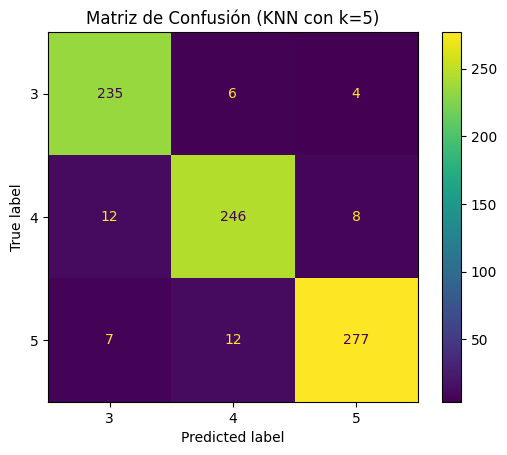

In [379]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title('Matriz de Confusión (KNN con k=5)')
plt.show()

# Predicciones con datos de prueba

### Original

In [380]:
from sklearn.ensemble import RandomForestClassifier
data = df.copy()
X_train, X_test, y_train, y_test = train_test_split(data[['words']], data['sdg'], random_state=42, stratify=data['sdg'], test_size=0.2)
X_train.shape, X_test.shape
y_train.head()

pd.Series(y_train).value_counts(normalize=True)

pd.Series(y_test).value_counts(normalize=True)

texts = X_train['words']

tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,
                                   stop_words=stop_words,
                                   lowercase=True)

X_tfidf = tfidf_vectorizer.fit_transform(texts)
X_tfidf.shape

print(f'Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}')
tfidf_model_best = RandomForestClassifier(random_state=7)

tfidf_model_best.fit(X_tfidf, y_train)

tfidf_estimators = tfidf_model_best.estimators_

y_train_tfidf_predict = tfidf_model_best.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model_best.predict(tfidf_vectorizer.transform(X_test["words"]))

c:\Users\fliap\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary size: 13184


### Predicciones

In [381]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data_new = pd.read_excel('./content/TestODScat_345.xlsx')

In [382]:
stop_words = stopwords.words('spanish')

X_new_texts = data_new['Textos_espanol']

X_new_tfidf = tfidf_vectorizer.transform(X_new_texts)

tfidf_model_best = RandomForestClassifier(random_state=7)
tfidf_model_best.fit(X_tfidf, y_train)

y_new_pred = tfidf_model_best.predict(X_new_tfidf)

data_new['sdg'] = y_new_pred

output_file = 'labeled_data.csv'
data_new.to_csv(output_file, index=False)